In [19]:
import numpy as np
import pandas as pd
import plotly.figure_factory as FF
import plotly.plotly as py
import plotly.graph_objs as go
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Jumlah Penumpang Pesawat di Bandara Utama (Orang) Keberangkatan pada Penerbangan Domestik

In [20]:
dataset = pd.read_csv(r'C:\Users\gilbe\Desktop\bps-modif2.csv')
indexedDataset = dataset.set_index(['data_content'])
dataset['nama_tahun'] = pd.to_datetime(dataset['nama_tahun'], infer_datetime_format=True)
table = FF.create_table(dataset)
iplot(table, filename='test') 

# A = Polonia
# B = Soekarno Hatta
# C = Juanda
# D = Ngurah Rai
# E = Hasanudin

In [21]:
A = dataset[['nama_tahun','data_content','nama_bandara']][dataset.nama_bandara=='Polonia']
A

nama_tahun  data_content nama_bandara
0   2006-01-01        169652      Polonia
5   2006-02-01        138623      Polonia
10  2006-03-01        125954      Polonia
15  2006-04-01        156892      Polonia
20  2006-05-01        147322      Polonia
25  2006-06-01        149066      Polonia
30  2006-07-01        174983      Polonia
35  2006-08-01        161806      Polonia
40  2006-09-01        150232      Polonia
45  2006-10-01        141810      Polonia
50  2006-11-01        173411      Polonia
55  2006-12-01        158444      Polonia
60  2007-01-01        178255      Polonia
65  2007-02-01        137660      Polonia
70  2007-03-01        156088      Polonia
75  2007-04-01        162801      Polonia
80  2007-05-01        162798      Polonia
85  2007-06-01        176319      Polonia
90  2007-07-01        202323      Polonia
95  2007-08-01        184786      Polonia
100 2007-09-01        161437      Polonia
105 2007-10-01        188249      Polonia
110 2007-11-01        174431      Polonia
115 2007-12-01        172387      Polonia
120 2008-01-01        202989      Polonia
125 2008-02-01        165375      Polonia
130 2008-03-01        176427      Polonia
135 2008-04-01        165088      Polonia
140 2008-05-01        156609      Polonia
145 2008-06-01        157456      Polonia
..         ...           ...          ...
680 2017-05-01        294629      Polonia
685 2017-06-01        280475      Polonia
690 2017-07-01        384004      Polonia
695 2017-08-01        309004      Polonia
700 2017-09-01        305698      Polonia
705 2017-10-01        307834      Polonia
710 2017-11-01        301136      Polonia
715 2017-12-01        318806      Polonia
720 2018-01-01        372984      Polonia
725 2018-02-01        290832      Polonia
730 2018-03-01        312516      Polonia
735 2018-04-01        324330      Polonia
740 2018-05-01        275394      Polonia
745 2018-06-01        336870      Polonia
750 2018-07-01        361523      Polonia
755 2018-08-01        317360      Polonia
760 2018-09-01        292582      Polonia
765 2018-10-01        307051      Polonia
770 2018-11-01        272602      Polonia
775 2018-12-01        257567      Polonia
780 2019-01-01        280839      Polonia
785 2019-02-01        198871      Polonia
790 2019-03-01        202298      Polonia
795 2019-04-01        195395      Polonia
800 2019-05-01        155731      Polonia
805 2019-06-01        245820      Polonia
810 2019-07-01        236011      Polonia
815 2019-08-01        225363      Polonia
820 2019-09-01        214364      Polonia
825 2019-10-01        255484      Polonia

[166 rows x 3 columns]

In [22]:
dataset['nama_tahun'] = pd.to_datetime(dataset['nama_tahun'], infer_datetime_format=True)
plt.title('Jumlah Penumpang Bandara Polonia \n tahun 2006-2019')
plt.plot(A.nama_tahun,A.data_content)
plt.show()

In [23]:
rolmean = A.data_content.rolling(window=12).mean()
rolstd = A.data_content.rolling(window=12).std()
print(rolmean, rolstd)

0                NaN
5                NaN
10               NaN
15               NaN
20               NaN
25               NaN
30               NaN
35               NaN
40               NaN
45               NaN
50               NaN
55     154016.250000
60     154733.166667
65     154652.916667
70     157164.083333
75     157656.500000
80     158946.166667
85     161217.250000
90     163495.583333
95     165410.583333
100    166344.333333
105    170214.250000
110    170299.250000
115    171461.166667
120    173522.333333
125    175831.916667
130    177526.833333
135    177717.416667
140    177201.666667
145    175629.750000
           ...      
680    297042.250000
685    297051.833333
690    297338.250000
695    297085.666667
700    299319.083333
705    300984.166667
710    304052.000000
715    306476.916667
720    309679.250000
725    312293.833333
730    314376.666667
735    316854.000000
740    315251.083333
745    319950.666667
750    318077.250000
755    318773.583333
760    317680

In [24]:
orig = plt.plot(A.data_content, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [25]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(dataset['data_content'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.750474
p-value                          0.405312
#Lags Used                      20.000000
Number of Observations Used    809.000000
Critical Value (1%)             -3.438459
Critical Value (5%)             -2.865119
Critical Value (10%)            -2.568676
dtype: float64


In [26]:
indexedDataset_logScale = np.log(A.data_content)
plt.plot(indexedDataset_logScale)

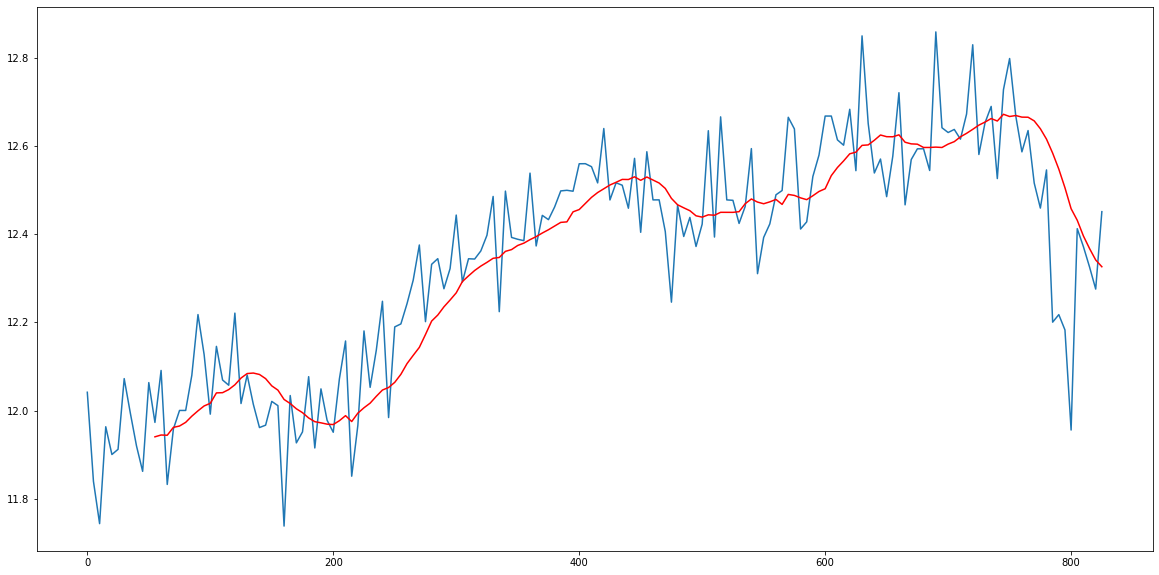

In [27]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [28]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

55     0.032667
60     0.146359
65    -0.111489
70    -0.003731
75     0.035297
80     0.026954
85     0.092747
90     0.218219
95     0.116486
100   -0.024592
Name: data_content, dtype: float64

In [29]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

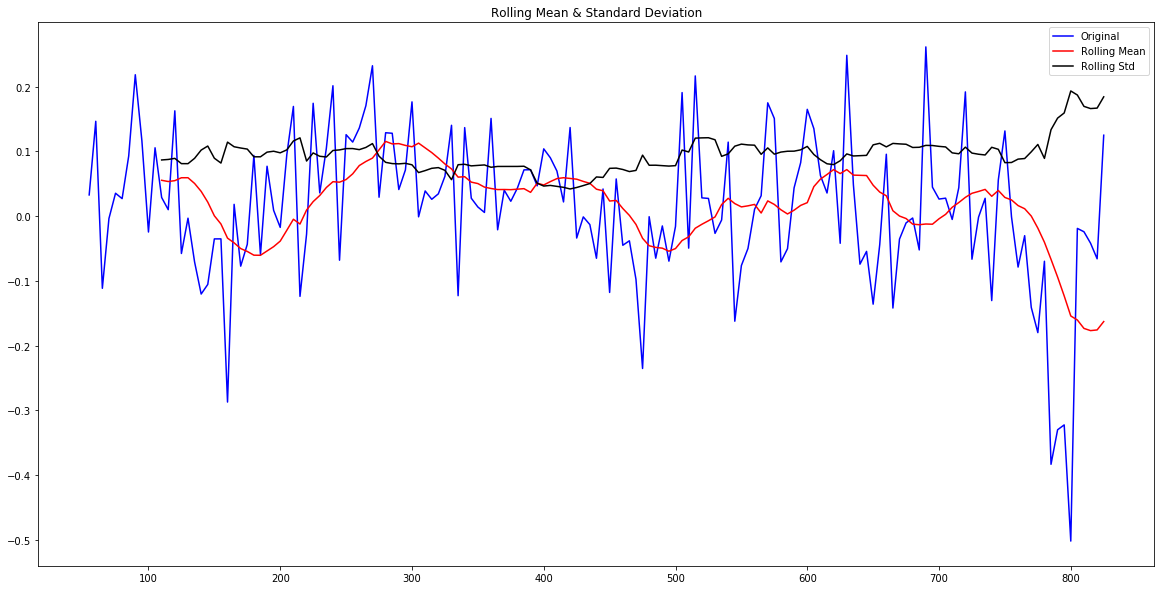

In [30]:
test_stationarity(datasetLogScaleMinusMovingAverage)

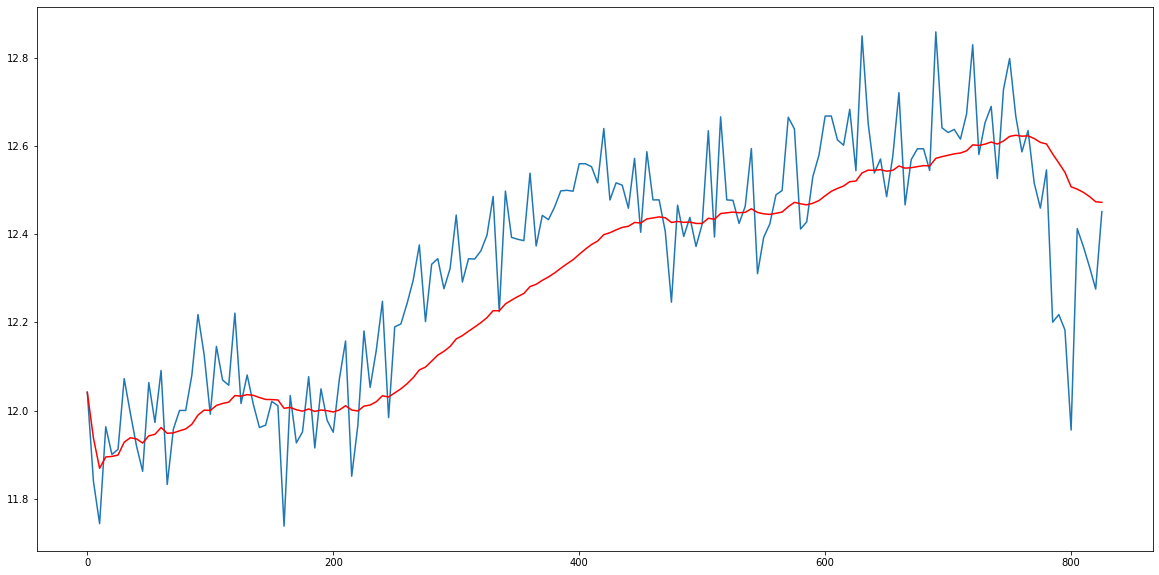

In [31]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

In [32]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

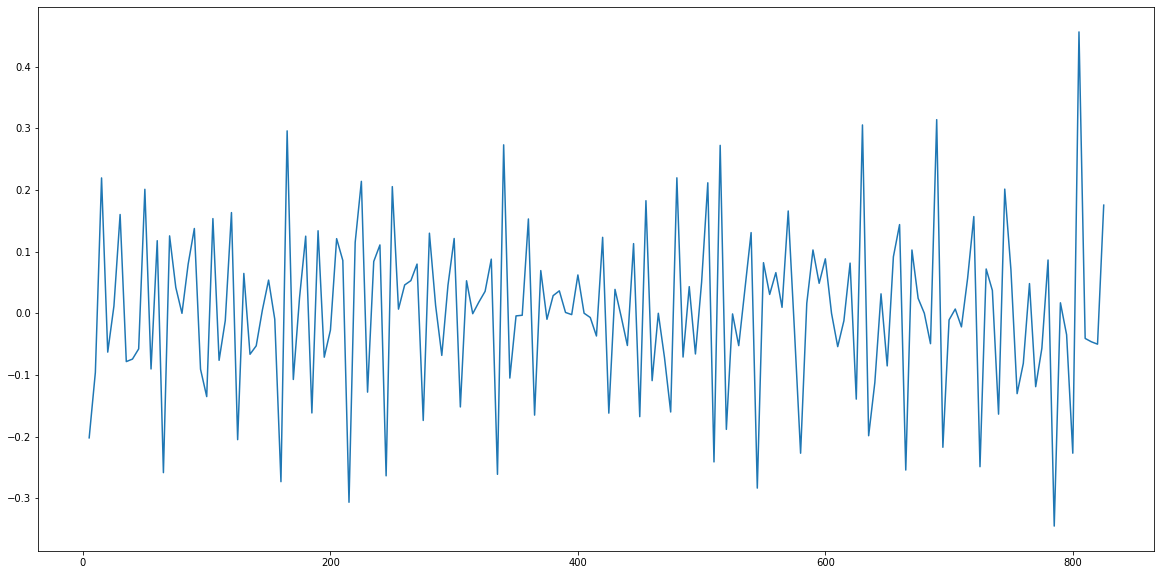

In [33]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

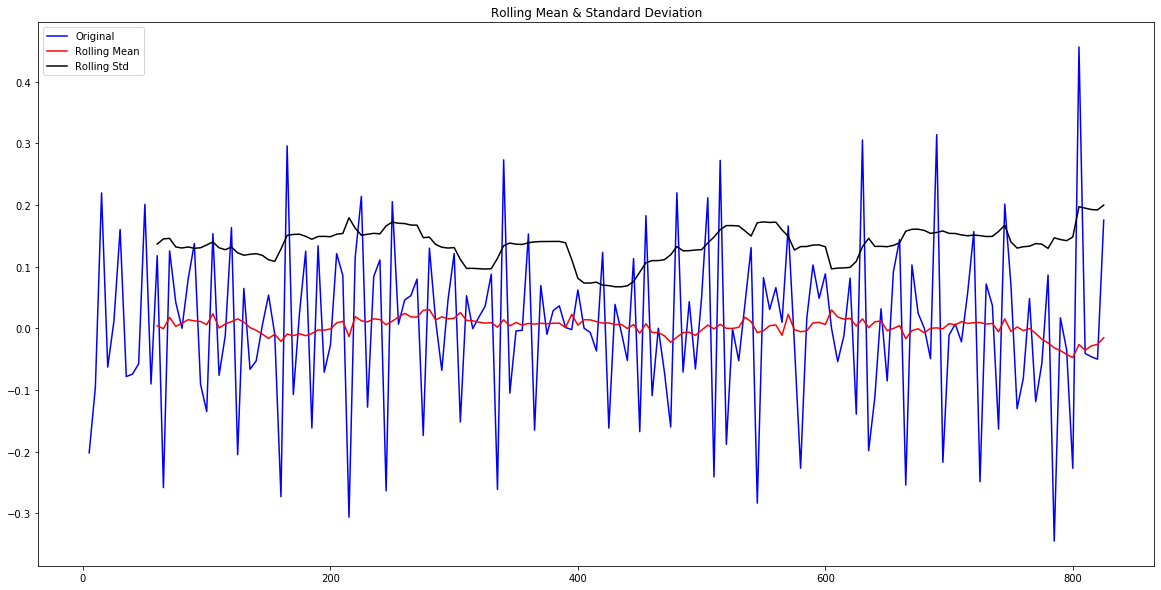

In [34]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = seasonal_decompose(indexedDataset_logScale).trend
seasonal = seasonal_decompose(indexedDataset_logScale).seasonal
residual = seasonal_decompose(indexedDataset_logScale).resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

In [40]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

NameError: name 'residual' is not defined

C:\Users\gilbe\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



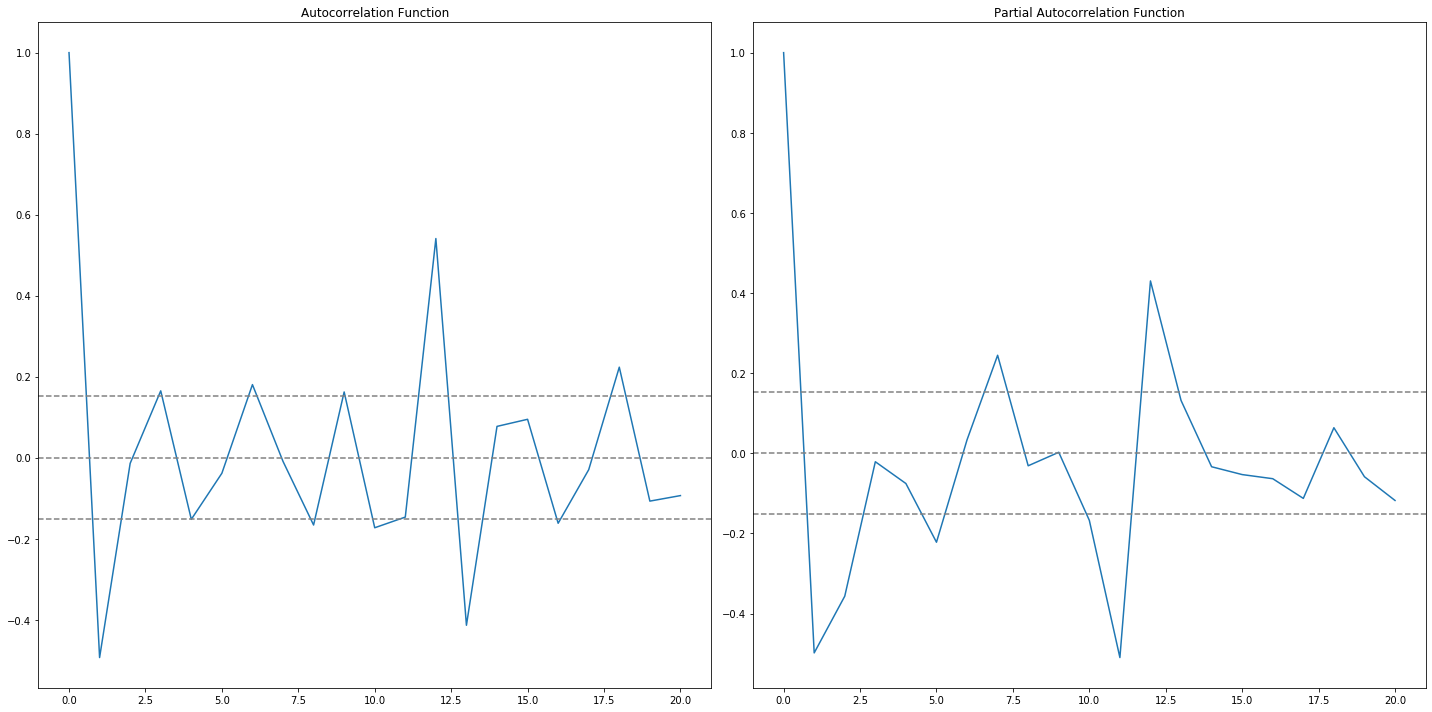

In [41]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\gilbe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\gilbe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Plotting AR model


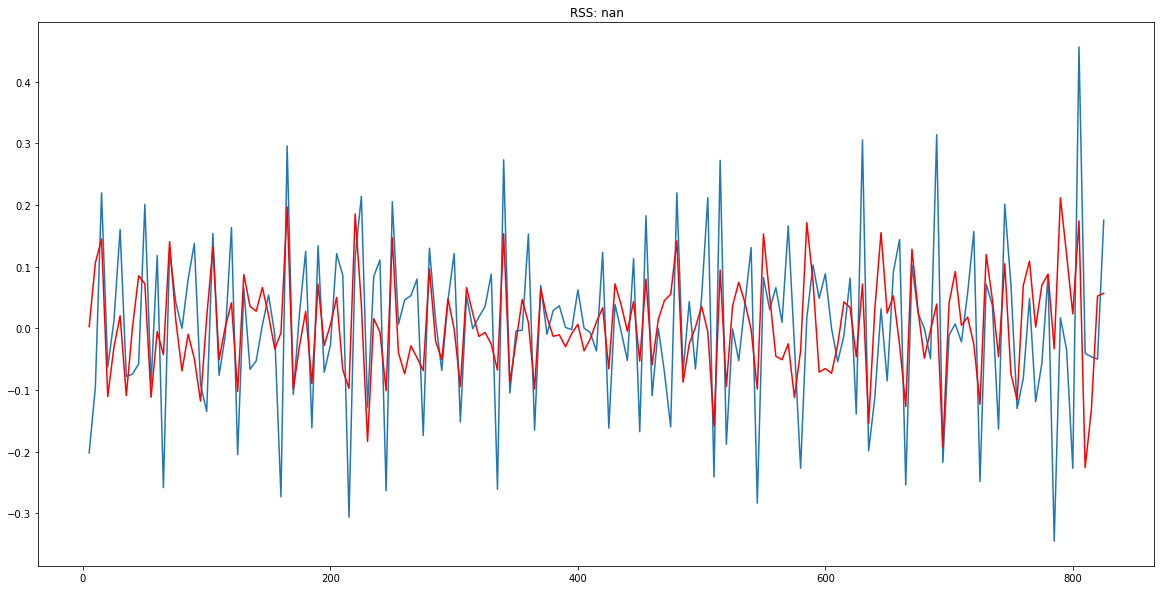

In [42]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting[indexedDataset_logScale])**2))
print('Plotting AR model')

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

5     0.002744
10    0.105422
15    0.144647
20   -0.096042
25   -0.021050
dtype: float64


In [45]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

5     0.002744
10    0.108167
15    0.252814
20    0.156772
25    0.135722
dtype: float64


In [46]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale.ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\gilbe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



0     12.041505
5     12.044249
10    12.149671
15    12.294318
20    12.198276
dtype: float64

TypeError: unhashable type: 'numpy.ndarray'

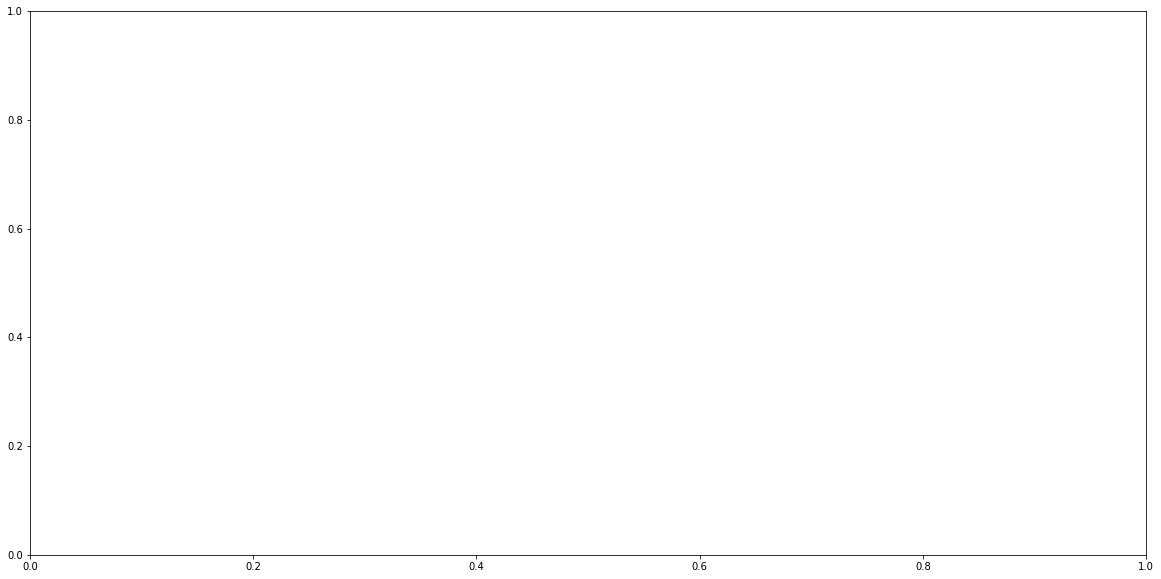

In [47]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset[indexedDataset_logScale])**2)/len(indexedDataset[indexedDataset_logScale])))

In [48]:
B = dataset[['nama_tahun','data_content','nama_bandara']][dataset.nama_bandara=='Soekarno Hatta']
B

nama_tahun  data_content    nama_bandara
1   2006-01-01       1005200  Soekarno Hatta
6   2006-02-01        723717  Soekarno Hatta
11  2006-03-01        863592  Soekarno Hatta
16  2006-04-01        867901  Soekarno Hatta
21  2006-05-01        864382  Soekarno Hatta
26  2006-06-01        879827  Soekarno Hatta
31  2006-07-01       1019569  Soekarno Hatta
36  2006-08-01        938124  Soekarno Hatta
41  2006-09-01        877088  Soekarno Hatta
46  2006-10-01        828707  Soekarno Hatta
51  2006-11-01        977587  Soekarno Hatta
56  2006-12-01       1034103  Soekarno Hatta
61  2007-01-01        866735  Soekarno Hatta
66  2007-02-01        635230  Soekarno Hatta
71  2007-03-01        830228  Soekarno Hatta
76  2007-04-01       1134174  Soekarno Hatta
81  2007-05-01        994805  Soekarno Hatta
86  2007-06-01       1001621  Soekarno Hatta
91  2007-07-01       1143997  Soekarno Hatta
96  2007-08-01       1065390  Soekarno Hatta
101 2007-09-01        892920  Soekarno Hatta
106 2007-10-01       1118994  Soekarno Hatta
111 2007-11-01       1080602  Soekarno Hatta
116 2007-12-01       1133595  Soekarno Hatta
121 2008-01-01       1034289  Soekarno Hatta
126 2008-02-01        928984  Soekarno Hatta
131 2008-03-01       1046821  Soekarno Hatta
136 2008-04-01        924350  Soekarno Hatta
141 2008-05-01        966971  Soekarno Hatta
146 2008-06-01        981207  Soekarno Hatta
..         ...           ...             ...
681 2017-05-01       1805970  Soekarno Hatta
686 2017-06-01       1788098  Soekarno Hatta
691 2017-07-01       2109734  Soekarno Hatta
696 2017-08-01       1891326  Soekarno Hatta
701 2017-09-01       1787086  Soekarno Hatta
706 2017-10-01       1841654  Soekarno Hatta
711 2017-11-01       1855288  Soekarno Hatta
716 2017-12-01       2108796  Soekarno Hatta
721 2018-01-01       1751059  Soekarno Hatta
726 2018-02-01       1698478  Soekarno Hatta
731 2018-03-01       1931117  Soekarno Hatta
736 2018-04-01       1949487  Soekarno Hatta
741 2018-05-01       1768565  Soekarno Hatta
746 2018-06-01       1998533  Soekarno Hatta
751 2018-07-01       2132360  Soekarno Hatta
756 2018-08-01       1932013  Soekarno Hatta
761 2018-09-01       1852076  Soekarno Hatta
766 2018-10-01       1916452  Soekarno Hatta
771 2018-11-01       1796523  Soekarno Hatta
776 2018-12-01       1883165  Soekarno Hatta
781 2019-01-01       1569630  Soekarno Hatta
786 2019-02-01       1427000  Soekarno Hatta
791 2019-03-01       1538314  Soekarno Hatta
796 2019-04-01       1403186  Soekarno Hatta
801 2019-05-01       1276006  Soekarno Hatta
806 2019-06-01       1568669  Soekarno Hatta
811 2019-07-01       1749777  Soekarno Hatta
816 2019-08-01       1714643  Soekarno Hatta
821 2019-09-01       1630312  Soekarno Hatta
826 2019-10-01       1738571  Soekarno Hatta

[166 rows x 3 columns]

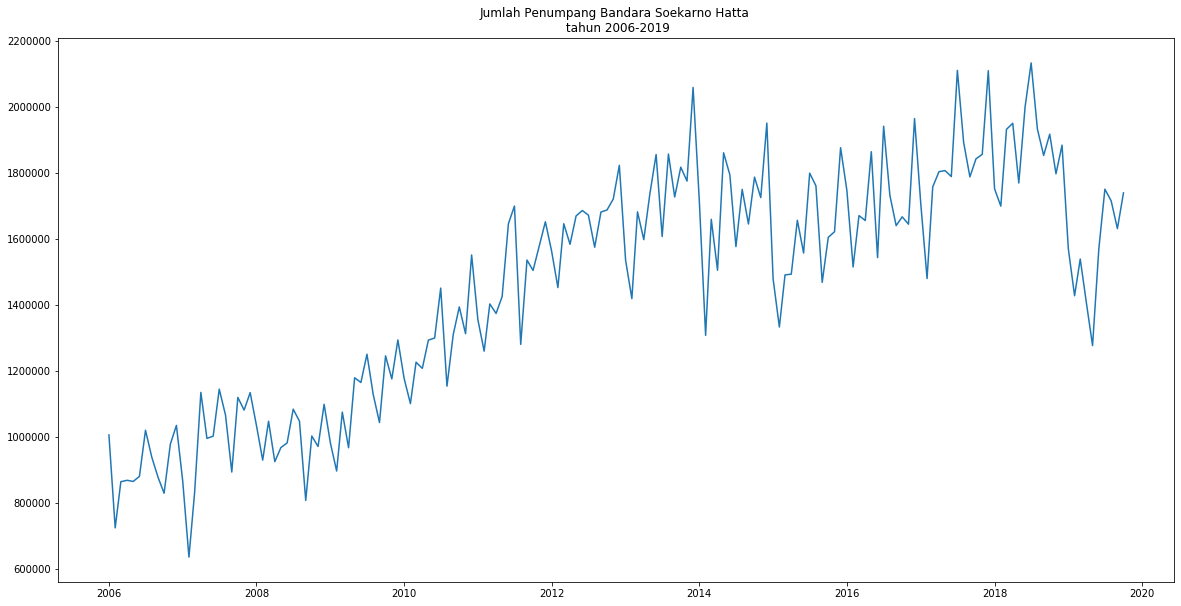

In [50]:
dataset['nama_tahun'] = pd.to_datetime(dataset['nama_tahun'], infer_datetime_format=True)
plt.title('Jumlah Penumpang Bandara Soekarno Hatta \n tahun 2006-2019')
plt.plot(B.nama_tahun,B.data_content)
plt.show()

In [51]:
rolmean = B.data_content.rolling(window=12).mean()
rolstd = B.data_content.rolling(window=12).std()
print(rolmean, rolstd)

1               NaN
6               NaN
11              NaN
16              NaN
21              NaN
26              NaN
31              NaN
36              NaN
41              NaN
46              NaN
51              NaN
56     9.066498e+05
61     8.951110e+05
66     8.877371e+05
71     8.849568e+05
76     9.071462e+05
81     9.180148e+05
86     9.281642e+05
91     9.385332e+05
96     9.491388e+05
101    9.504581e+05
106    9.746487e+05
111    9.832332e+05
116    9.915242e+05
121    1.005487e+06
126    1.029967e+06
131    1.048016e+06
136    1.030531e+06
141    1.028211e+06
146    1.026510e+06
           ...     
681    1.723019e+06
686    1.743486e+06
691    1.757571e+06
696    1.770938e+06
701    1.783248e+06
706    1.797884e+06
711    1.815509e+06
716    1.827607e+06
721    1.831478e+06
726    1.849760e+06
731    1.864297e+06
736    1.876508e+06
741    1.873391e+06
746    1.890927e+06
751    1.892812e+06
756    1.896203e+06
761    1.901619e+06
766    1.907852e+06
771    1.902955e+06


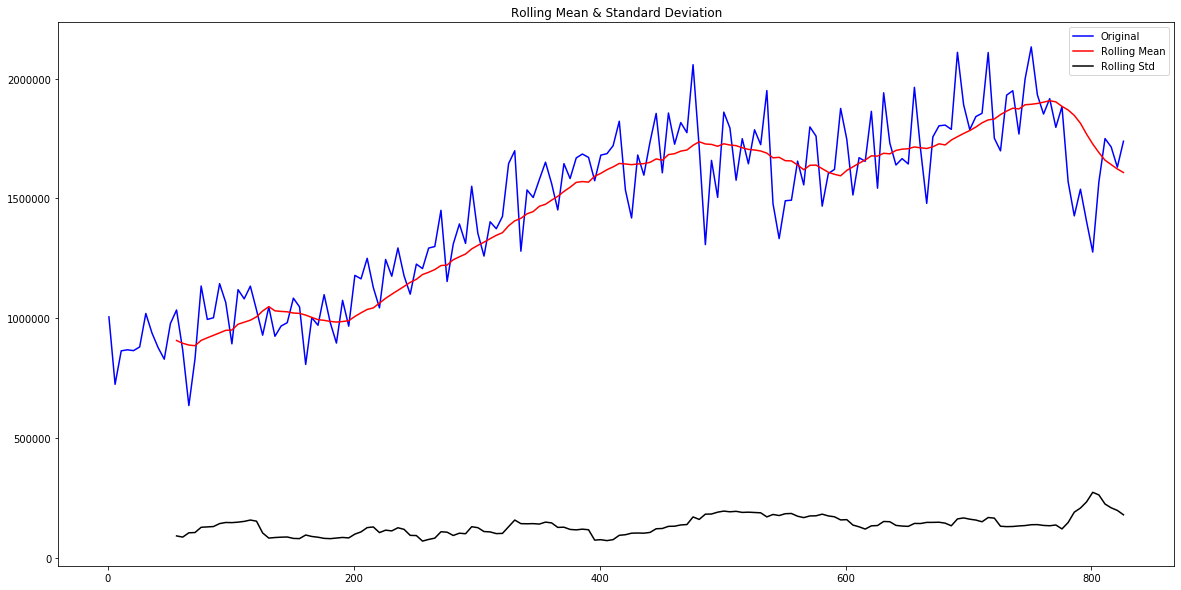

In [52]:
orig = plt.plot(B.data_content, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [53]:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(dataset['data_content'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.750474
p-value                          0.405312
#Lags Used                      20.000000
Number of Observations Used    809.000000
Critical Value (1%)             -3.438459
Critical Value (5%)             -2.865119
Critical Value (10%)            -2.568676
dtype: float64


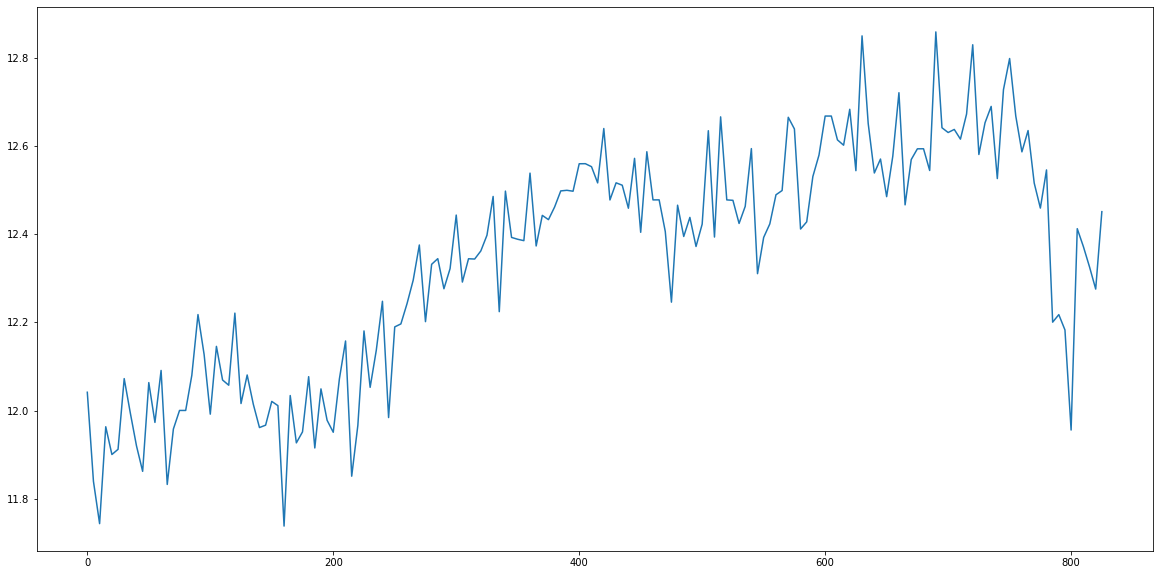

In [54]:
indexedDataset_logScale = np.log(A.data_content)
plt.plot(indexedDataset_logScale)

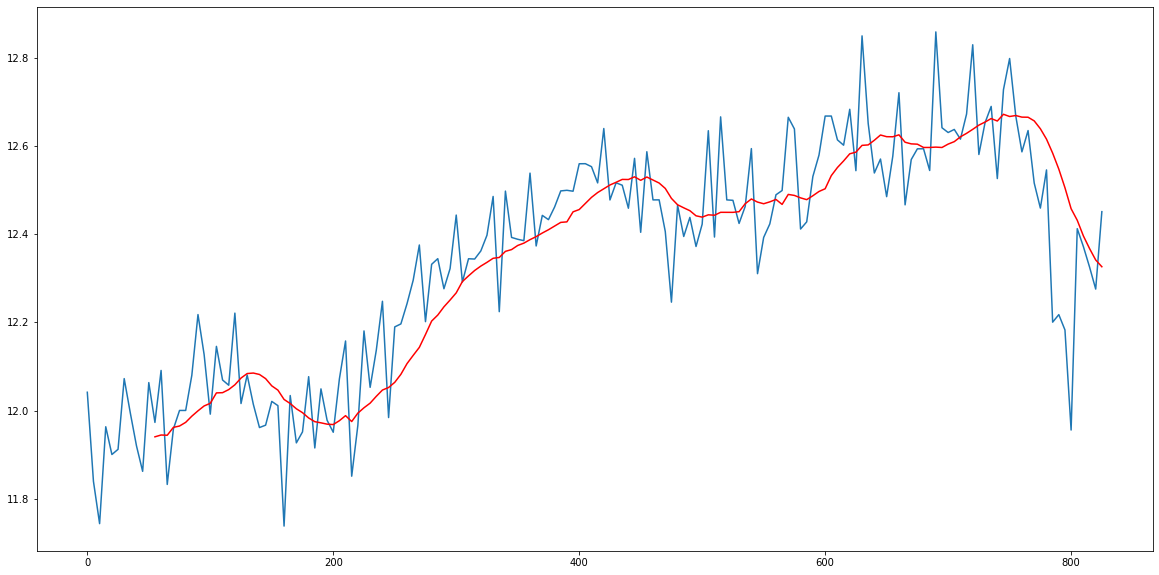

In [55]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

In [56]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

55     0.032667
60     0.146359
65    -0.111489
70    -0.003731
75     0.035297
80     0.026954
85     0.092747
90     0.218219
95     0.116486
100   -0.024592
Name: data_content, dtype: float64

In [57]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

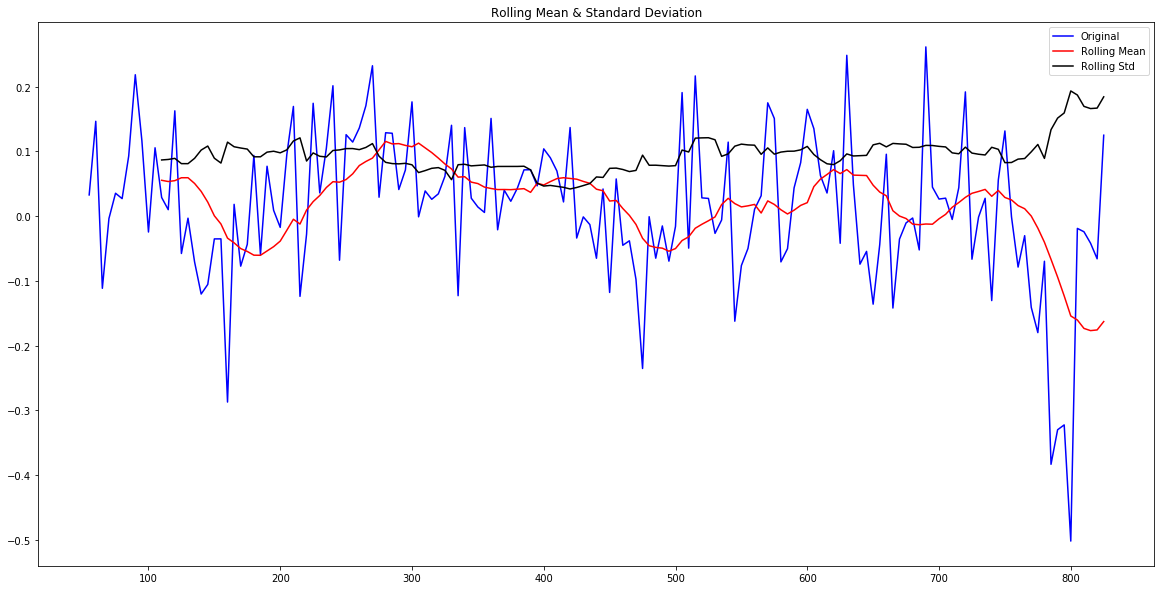

In [58]:
test_stationarity(datasetLogScaleMinusMovingAverage)

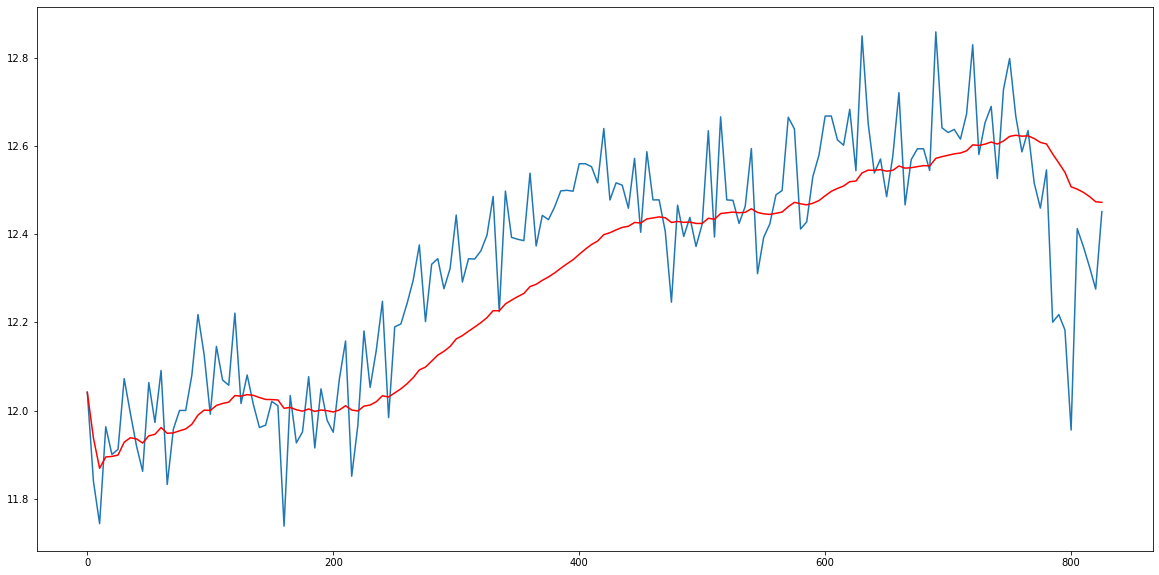

In [59]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

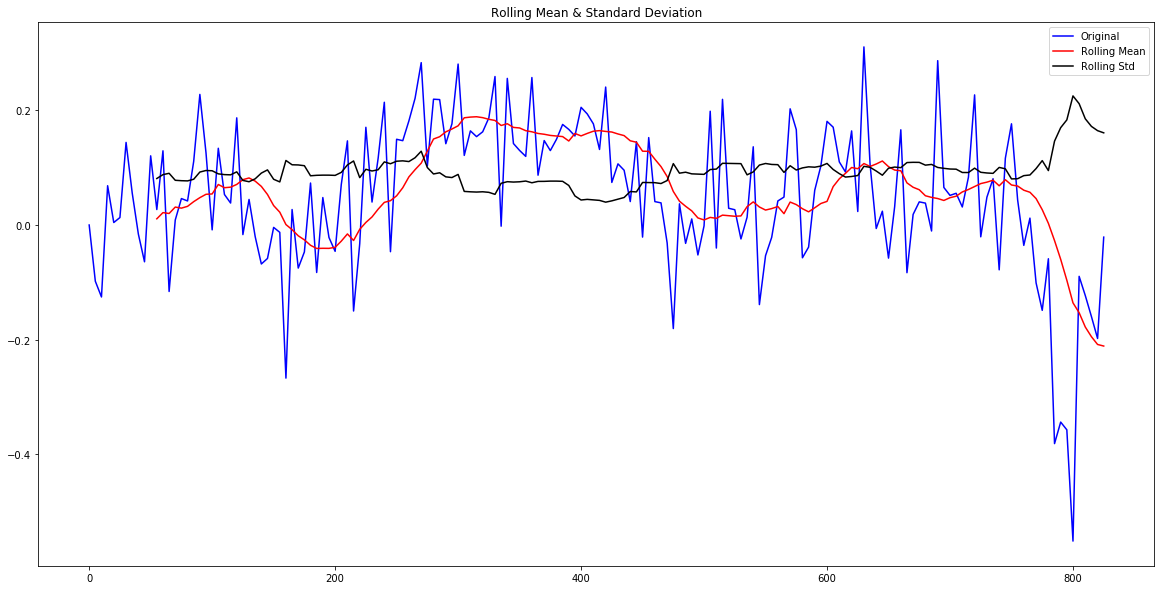

In [60]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

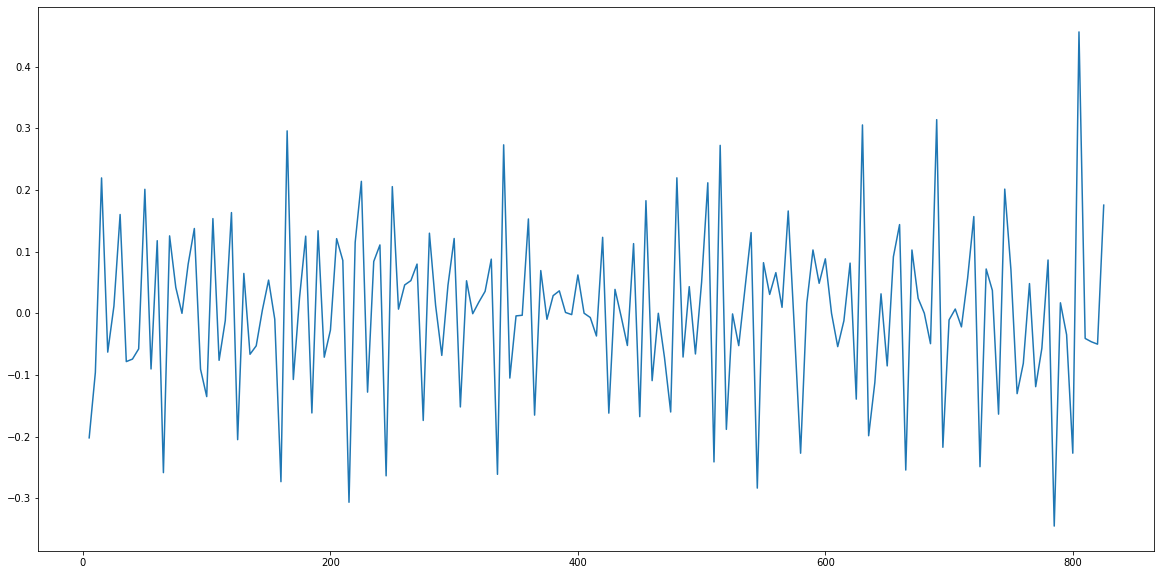

In [61]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

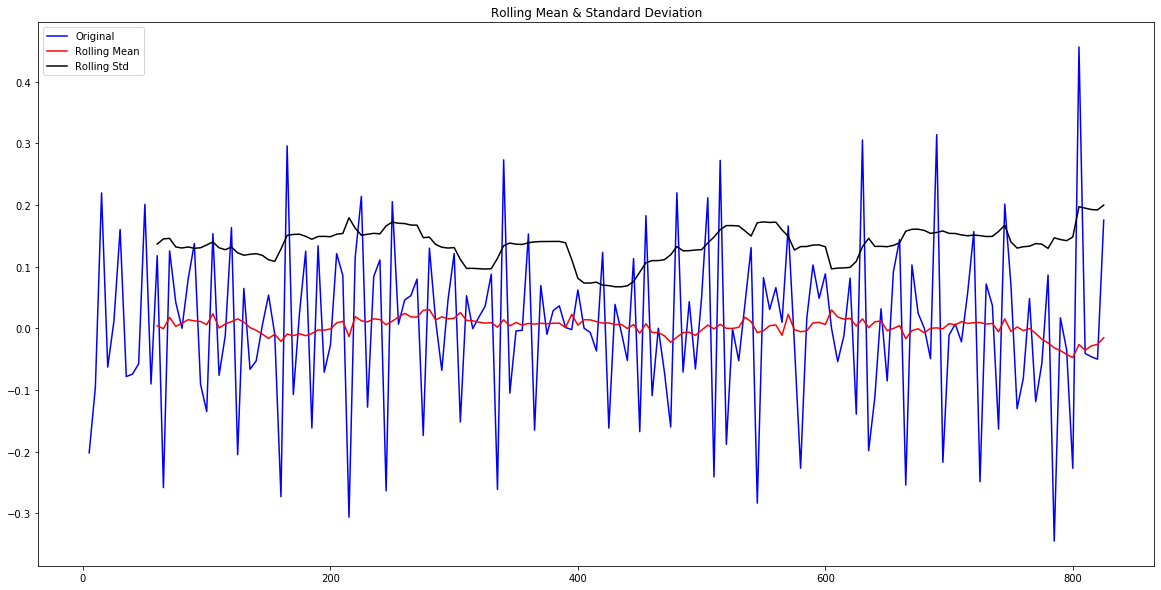

In [62]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

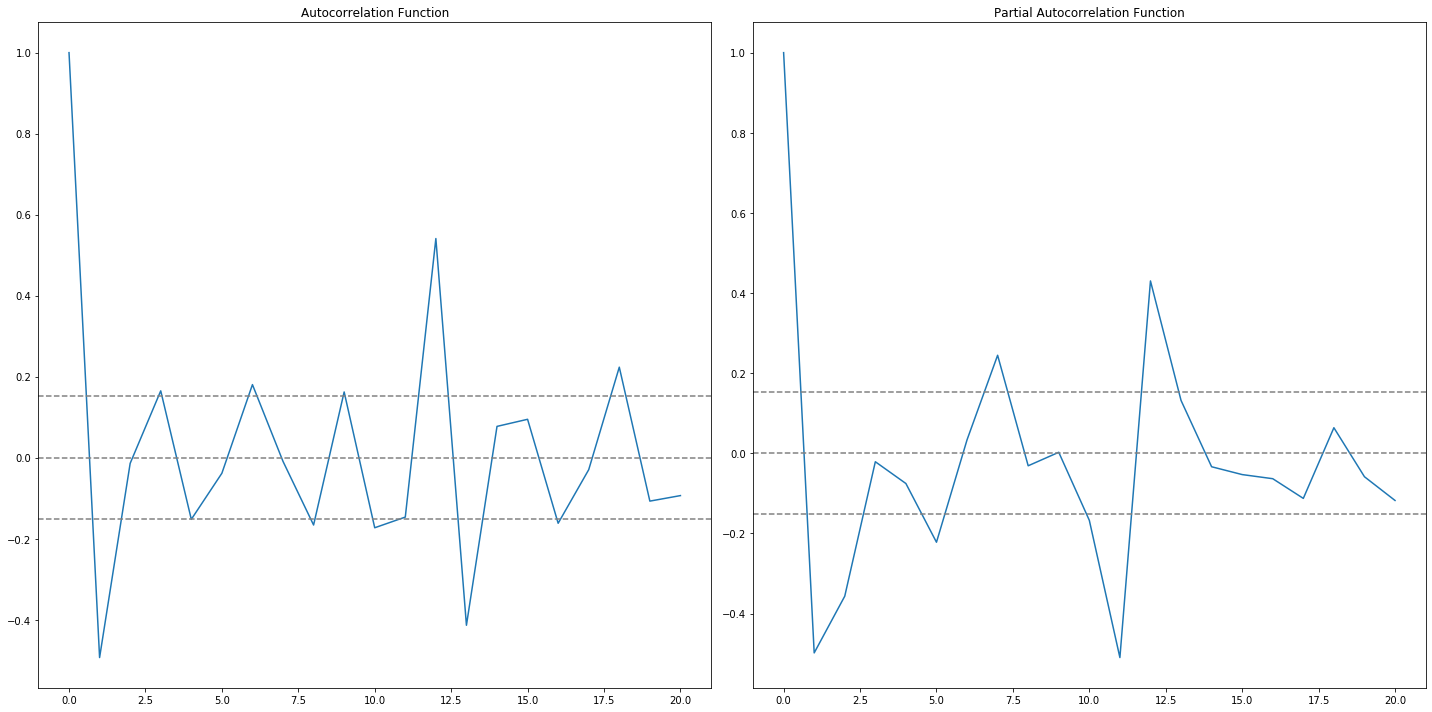

In [64]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\gilbe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\gilbe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



Plotting AR model


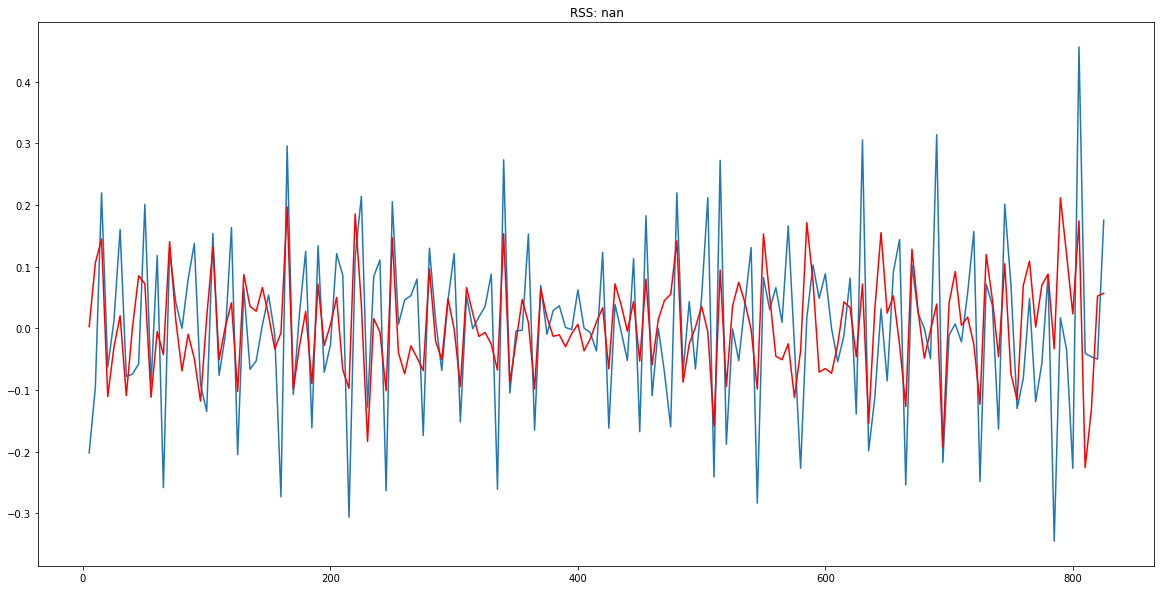

In [65]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting[indexedDataset_logScale])**2))
print('Plotting AR model')

In [66]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

5     0.002744
10    0.105422
15    0.144647
20   -0.096042
25   -0.021050
dtype: float64


In [67]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

5     0.002744
10    0.108167
15    0.252814
20    0.156772
25    0.135722
dtype: float64


In [68]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale.ix[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

C:\Users\gilbe\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning:


.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated



0     12.041505
5     12.044249
10    12.149671
15    12.294318
20    12.198276
dtype: float64

# Untuk Bandara sisanya, untuk mengolah data nya sama seperti langkah diatas

In [71]:
C = dataset[['nama_tahun','data_content','nama_bandara']][dataset.nama_bandara=='Juanda']
C

nama_tahun  data_content nama_bandara
2   2006-01-01        329764       Juanda
7   2006-02-01        257149       Juanda
12  2006-03-01        280060       Juanda
17  2006-04-01        291600       Juanda
22  2006-05-01        295221       Juanda
27  2006-06-01        297728       Juanda
32  2006-07-01        337635       Juanda
37  2006-08-01        326158       Juanda
42  2006-09-01        284216       Juanda
47  2006-10-01        255118       Juanda
52  2006-11-01        284825       Juanda
57  2006-12-01        312713       Juanda
62  2007-01-01        301274       Juanda
67  2007-02-01        236082       Juanda
72  2007-03-01        270626       Juanda
77  2007-04-01        270891       Juanda
82  2007-05-01        288669       Juanda
87  2007-06-01        288314       Juanda
92  2007-07-01        340639       Juanda
97  2007-08-01        321013       Juanda
102 2007-09-01        269195       Juanda
107 2007-10-01        327779       Juanda
112 2007-11-01        332135       Juanda
117 2007-12-01        324457       Juanda
122 2008-01-01        328446       Juanda
127 2008-02-01        282242       Juanda
132 2008-03-01        310829       Juanda
137 2008-04-01        275959       Juanda
142 2008-05-01        281806       Juanda
147 2008-06-01        281428       Juanda
..         ...           ...          ...
682 2017-05-01        618375       Juanda
687 2017-06-01        539747       Juanda
692 2017-07-01        889548       Juanda
697 2017-08-01        676016       Juanda
702 2017-09-01        696308       Juanda
707 2017-10-01        655005       Juanda
712 2017-11-01        666423       Juanda
717 2017-12-01        735560       Juanda
722 2018-01-01        689756       Juanda
727 2018-02-01        597290       Juanda
732 2018-03-01        660707       Juanda
737 2018-04-01        671763       Juanda
742 2018-05-01        592835       Juanda
747 2018-06-01        706372       Juanda
752 2018-07-01        856010       Juanda
757 2018-08-01        720669       Juanda
762 2018-09-01        706926       Juanda
767 2018-10-01        688559       Juanda
772 2018-11-01        634151       Juanda
777 2018-12-01        642080       Juanda
782 2019-01-01        560250       Juanda
787 2019-02-01        473070       Juanda
792 2019-03-01        481147       Juanda
797 2019-04-01        443457       Juanda
802 2019-05-01        378933       Juanda
807 2019-06-01        607024       Juanda
812 2019-07-01        620237       Juanda
817 2019-08-01        541273       Juanda
822 2019-09-01        515321       Juanda
827 2019-10-01        543876       Juanda

[166 rows x 3 columns]

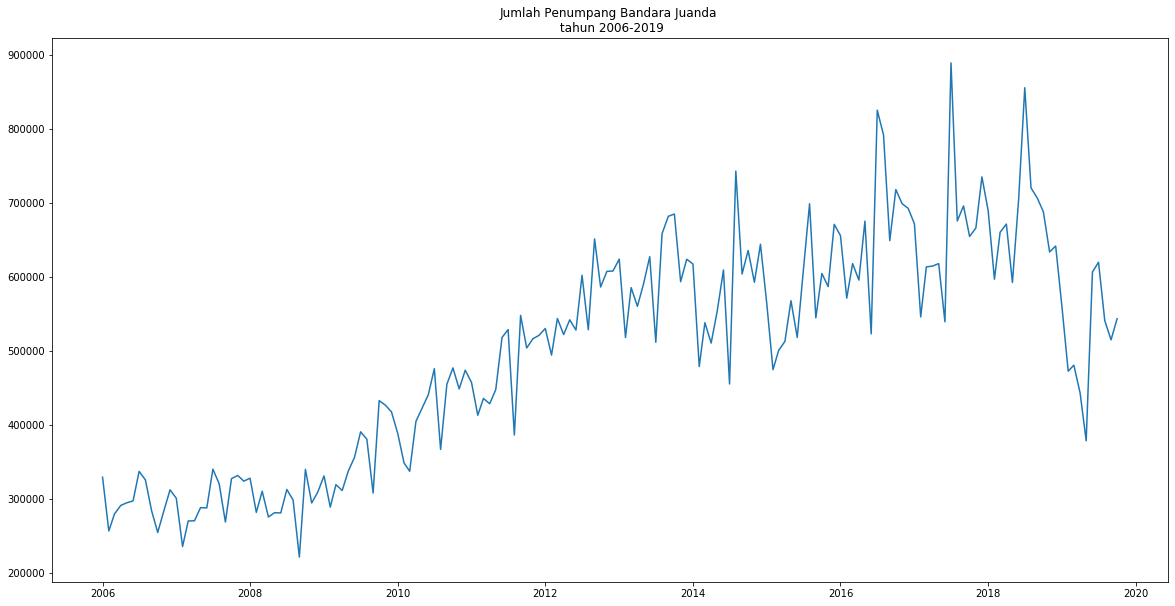

In [72]:
dataset['nama_tahun'] = pd.to_datetime(dataset['nama_tahun'], infer_datetime_format=True)
plt.plot(C.nama_tahun,C.data_content)
plt.title('Jumlah Penumpang Bandara Juanda \n tahun 2006-2019')
plt.show()

In [73]:
D = dataset[['nama_tahun','data_content','nama_bandara']][dataset.nama_bandara=='Ngurah Rai']
D

nama_tahun  data_content nama_bandara
3   2006-01-01        136457   Ngurah Rai
8   2006-02-01        107825   Ngurah Rai
13  2006-03-01        119168   Ngurah Rai
18  2006-04-01        142807   Ngurah Rai
23  2006-05-01        125653   Ngurah Rai
28  2006-06-01        134069   Ngurah Rai
33  2006-07-01        165858   Ngurah Rai
38  2006-08-01        154563   Ngurah Rai
43  2006-09-01        143650   Ngurah Rai
48  2006-10-01        130328   Ngurah Rai
53  2006-11-01        144359   Ngurah Rai
58  2006-12-01        154584   Ngurah Rai
63  2007-01-01        151069   Ngurah Rai
68  2007-02-01        112306   Ngurah Rai
73  2007-03-01        128666   Ngurah Rai
78  2007-04-01        136348   Ngurah Rai
83  2007-05-01        152837   Ngurah Rai
88  2007-06-01        164609   Ngurah Rai
93  2007-07-01        203672   Ngurah Rai
98  2007-08-01        191489   Ngurah Rai
103 2007-09-01        152411   Ngurah Rai
108 2007-10-01        189543   Ngurah Rai
113 2007-11-01        168766   Ngurah Rai
118 2007-12-01        190508   Ngurah Rai
123 2008-01-01        179548   Ngurah Rai
128 2008-02-01        160440   Ngurah Rai
133 2008-03-01        176039   Ngurah Rai
138 2008-04-01        153204   Ngurah Rai
143 2008-05-01        172161   Ngurah Rai
148 2008-06-01        172523   Ngurah Rai
..         ...           ...          ...
683 2017-05-01        442834   Ngurah Rai
688 2017-06-01        393120   Ngurah Rai
693 2017-07-01        547576   Ngurah Rai
698 2017-08-01        506510   Ngurah Rai
703 2017-09-01        456201   Ngurah Rai
708 2017-10-01        414066   Ngurah Rai
713 2017-11-01        367584   Ngurah Rai
718 2017-12-01        394869   Ngurah Rai
723 2018-01-01        449389   Ngurah Rai
728 2018-02-01        401856   Ngurah Rai
733 2018-03-01        427958   Ngurah Rai
738 2018-04-01        467257   Ngurah Rai
743 2018-05-01        433394   Ngurah Rai
748 2018-06-01        479185   Ngurah Rai
753 2018-07-01        546118   Ngurah Rai
758 2018-08-01        509763   Ngurah Rai
763 2018-09-01        464489   Ngurah Rai
768 2018-10-01        481774   Ngurah Rai
773 2018-11-01        440613   Ngurah Rai
778 2018-12-01        475739   Ngurah Rai
783 2019-01-01        428629   Ngurah Rai
788 2019-02-01        357076   Ngurah Rai
793 2019-03-01        369930   Ngurah Rai
798 2019-04-01        364220   Ngurah Rai
803 2019-05-01        289400   Ngurah Rai
808 2019-06-01        460273   Ngurah Rai
813 2019-07-01        459284   Ngurah Rai
818 2019-08-01        480603   Ngurah Rai
823 2019-09-01        424781   Ngurah Rai
828 2019-10-01        435861   Ngurah Rai

[166 rows x 3 columns]

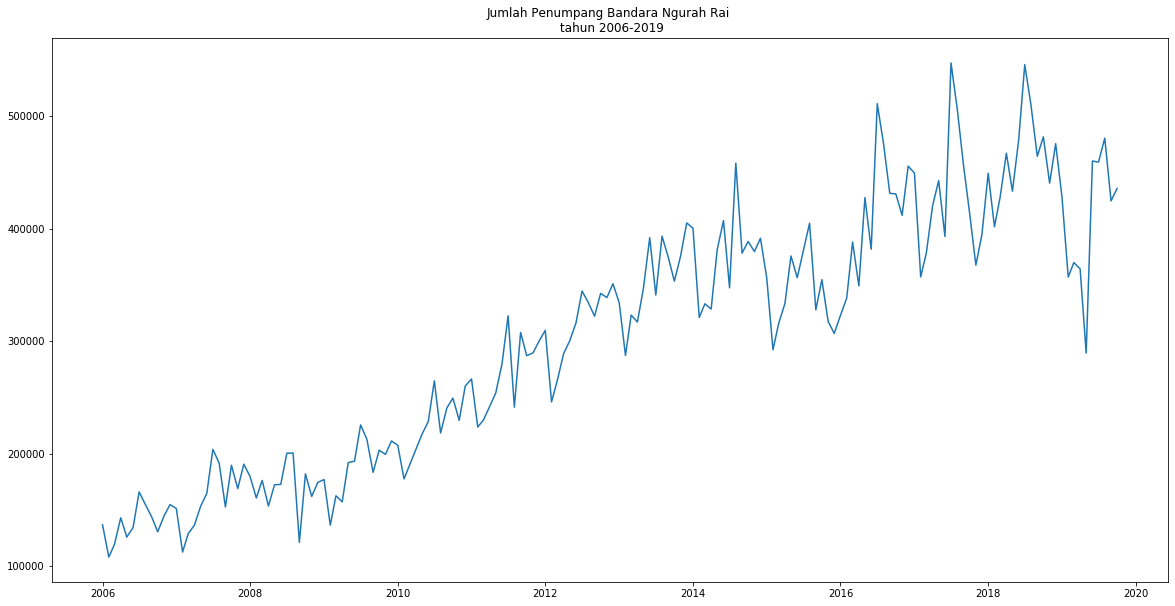

In [74]:
dataset['nama_tahun'] = pd.to_datetime(dataset['nama_tahun'], infer_datetime_format=True)
plt.plot(D.nama_tahun, D.data_content)
plt.title('Jumlah Penumpang Bandara Ngurah Rai \n tahun 2006-2019')
plt.show()

In [75]:
E = dataset[['nama_tahun','data_content','nama_bandara']][dataset.nama_bandara=='Hasanudin']
E

nama_tahun  data_content nama_bandara
4   2006-01-01        109646    Hasanudin
9   2006-02-01         93528    Hasanudin
14  2006-03-01        105850    Hasanudin
19  2006-04-01        108381    Hasanudin
24  2006-05-01        111989    Hasanudin
29  2006-06-01        119449    Hasanudin
34  2006-07-01        141863    Hasanudin
39  2006-08-01        133200    Hasanudin
44  2006-09-01        124353    Hasanudin
49  2006-10-01        107728    Hasanudin
54  2006-11-01        133415    Hasanudin
59  2006-12-01        123649    Hasanudin
64  2007-01-01        119125    Hasanudin
69  2007-02-01         93441    Hasanudin
74  2007-03-01        110552    Hasanudin
79  2007-04-01        111920    Hasanudin
84  2007-05-01        124718    Hasanudin
89  2007-06-01        121728    Hasanudin
94  2007-07-01        143273    Hasanudin
99  2007-08-01        142540    Hasanudin
104 2007-09-01        143965    Hasanudin
109 2007-10-01        172130    Hasanudin
114 2007-11-01        158002    Hasanudin
119 2007-12-01        182100    Hasanudin
124 2008-01-01        139850    Hasanudin
129 2008-02-01        120389    Hasanudin
134 2008-03-01        130313    Hasanudin
139 2008-04-01        118046    Hasanudin
144 2008-05-01        139983    Hasanudin
149 2008-06-01        128220    Hasanudin
..         ...           ...          ...
684 2017-05-01        339579    Hasanudin
689 2017-06-01        295404    Hasanudin
694 2017-07-01        437365    Hasanudin
699 2017-08-01        339820    Hasanudin
704 2017-09-01        363580    Hasanudin
709 2017-10-01        355451    Hasanudin
714 2017-11-01        344065    Hasanudin
719 2017-12-01        366189    Hasanudin
724 2018-01-01        369341    Hasanudin
729 2018-02-01        309966    Hasanudin
734 2018-03-01        344360    Hasanudin
739 2018-04-01        358725    Hasanudin
744 2018-05-01        329273    Hasanudin
749 2018-06-01        378082    Hasanudin
754 2018-07-01        431134    Hasanudin
759 2018-08-01        361641    Hasanudin
764 2018-09-01        364450    Hasanudin
769 2018-10-01        376212    Hasanudin
774 2018-11-01        338239    Hasanudin
779 2018-12-01        359634    Hasanudin
784 2019-01-01        299845    Hasanudin
789 2019-02-01        242539    Hasanudin
794 2019-03-01        261757    Hasanudin
799 2019-04-01        246228    Hasanudin
804 2019-05-01        221716    Hasanudin
809 2019-06-01        306475    Hasanudin
814 2019-07-01        307516    Hasanudin
819 2019-08-01        291482    Hasanudin
824 2019-09-01        289609    Hasanudin
829 2019-10-01        295343    Hasanudin

[166 rows x 3 columns]

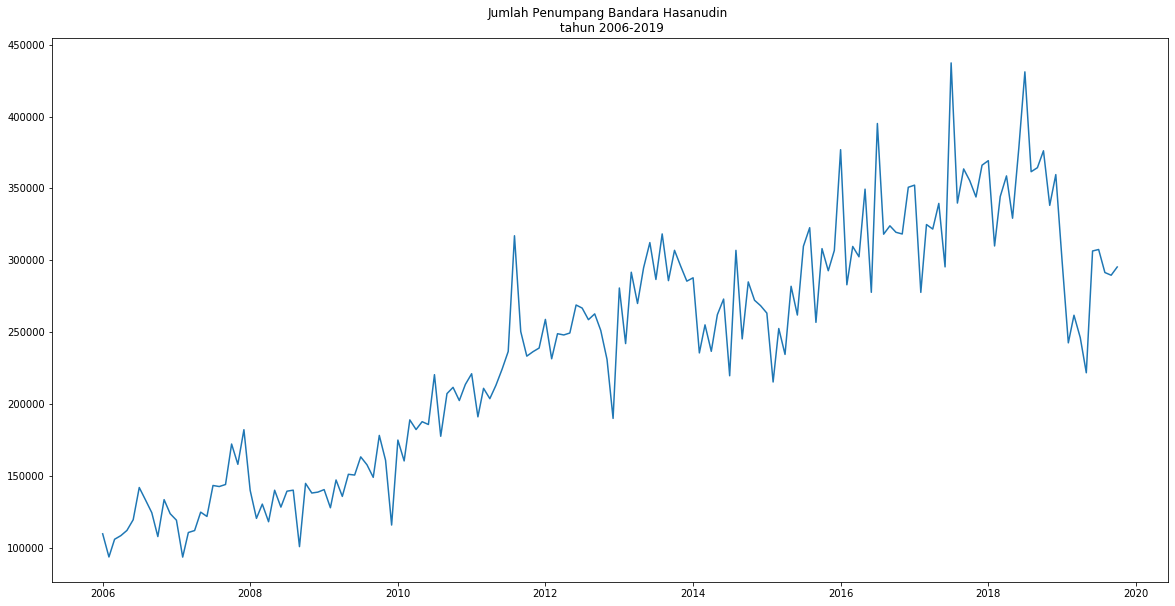

In [76]:
dataset['nama_tahun'] = pd.to_datetime(dataset['nama_tahun'], infer_datetime_format=True)
plt.plot(E.nama_tahun, E.data_content)
plt.title('Jumlah Penumpang Bandara Hasanudin \n tahun 2006-2019')
plt.show()